In [86]:
from tensorflow.keras.models import model_from_json

# Model reconstruction from JSON file
with open('base_model_dogs_and_cats.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('weights.basic.best.h5')

In [87]:
def build_label(dataset):
  return [1 if "dog" in filename else 0 for filename in dataset ]

In [88]:
import os 
from random import shuffle

original_dataset_dir = './dataset/dogs_and_cats'
test_dir = os.path.join(original_dataset_dir, "train")
filenames = [filename for filename in os.listdir(test_dir)]

shuffle(filenames)

In [89]:
test_set = filenames[:5000]
test_label = build_label(test_set)

In [90]:
import pandas as pd
data = {"filename": test_set, "label": test_label}
test_df = pd.DataFrame(data)

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(
    rescale=1./255)


test_datagenerator = image_generator.flow_from_dataframe(
  test_df, test_dir, y_col="label", target_size=(150,150),batch_size=100, class_mode="binary")

Found 5000 images belonging to 2 classes.


In [106]:
y_probabilities = model.predict_generator(test_datagenerator)

In [107]:
pred = (y_probabilities > 0.5).flatten() + 0

In [108]:
sum(pred == test_label) / len(test_label)

0.5086

In [272]:
target_file =os.path.join(test_dir,filenames[500])

In [273]:
from tensorflow.keras.preprocessing import image
import numpy as np

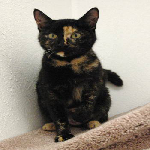

In [274]:
img = image.load_img(target_file, target_size=(150,150))
img

In [275]:
image.img_to_array(img).shape

(150, 150, 3)

In [276]:
image_tensor = image.img_to_array(img).reshape(1, 150, 150, 3)
image_tensor.shape

(1, 150, 150, 3)

In [277]:
image_tensor /= 255.

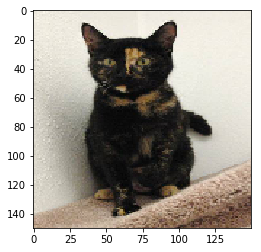

In [278]:
import matplotlib.pyplot as plt

plt.imshow(image_tensor[0])

In [279]:
from tensorflow.keras import models

In [280]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [281]:
layer_outputs

[<tf.Tensor 'conv2d_9/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1_7/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1_7/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2_7/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2_7/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'flatten_7/Reshape:0' shape=(?, 36992) dtype=float32>,
 <tf.Tensor 'dense_8/Relu:0' shape=(?, 512) dtype=float32>]

In [282]:
activations = activation_model.predict(image_tensor)
len(activations)

8

In [283]:
activations[0].shape

(1, 148, 148, 32)

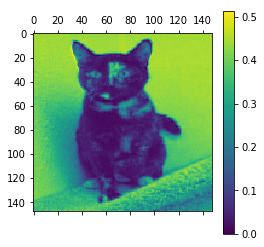

In [284]:

plt.matshow(activations[0][0, : , : , 0], cmap='viridis')
clb = plt.colorbar()


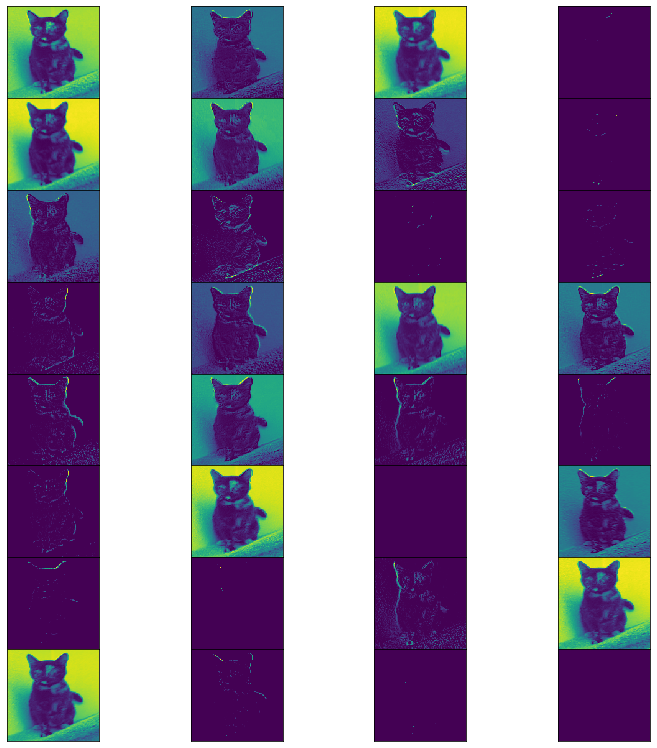

In [285]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
fig.set_size_inches(10.5, 10.5, forward=True)

ax = [fig.add_subplot(8,4,i+1) for i in range(32)]

for idx, a in enumerate(ax):
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect('equal')

    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    a.matshow(activations[0][0, : , : , idx])
    
fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)